# EDA

In [1]:
# Set Up
import pandas as pd
import numpy as np

# These lines make warnings look nicer
import warnings
warnings.simplefilter('ignore', FutureWarning)

# Graphing
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10,10)
import seaborn as sns
import plotly.express as px

In [2]:
# !pip install sodapy
# !pip install --upgrade pip
from sodapy import Socrata

# Importing and Cleaning Criminal Court Summons

The following data is about NYPD Criminal Court Summons in New York and can be found with the following link
https://data.cityofnewyork.us/Public-Safety/NYPD-Criminal-Court-Summons-Incident-Level-Data-Ye/mv4k-y93f




Let's utilize the Socrata API to import 2000 rows of the data and see what needs to be done in terms of cleaning, data type, etc.

In [3]:
client = Socrata("data.cityofnewyork.us", None)


# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("mv4k-y93f", limit=50000)

# Convert to pandas DataFrame
summons = pd.DataFrame.from_records(results)
summons.head()

,age_group,boro,jurisdiction_code,latitude,law_description,law_section_number,longitude,offense_description,precinct_of_occur,race,sex,summons_category_type,summons_date,summons_key,x_coordinate_cd,y_coordinate_cd
0,UNKNOWN,QUEENS,0,40.762315800000074,NYS Transportation,CFR 49,-73.82744800199998,FEDERAL MOTOR VEH. SAFETY REG,109,NaN,NaN,NYS TRANS,2020-03-31T00:00:00.000,211628050,1032051,217053
1,25-44,QUEENS,0,40.60397359400002,Penal Law,140.05,-73.74789089299998,TRESPASS,101,WHITE HISPANIC,M,TRESPASS,2020-03-31T00:00:00.000,211633844,1054256,159418
2,18-24,BRONX,0,40.87617086100005,Penal Law,140.05,-73.88584042899998,TRESPASS,52,BLACK HISPANIC,M,TRESPASS,2020-03-31T00:00:00.000,211629476,1015821,258508
3,<18,BRONX,0,40.87617086100005,Penal Law,140.05,-73.88584042899998,TRESPASS,52,WHITE HISPANIC,F,TRESPASS,2020-03-31T00:00:00.000,211628047,1015821,258508
4,18-24,BRONX,0,40.82042804100007,Penal Law,221.05,-73.89388461399994,"MARIJUANA, UNLAWFUL POSSESSION 2ND DEGREE",41,BLACK,M,MARIJUANA,2020-03-31T00:00:00.000,211633827,1013621,238196


# Timestamp
The summons_date column is encoded in ISO8601 Times so lets convert that from the string into a datetime object.

In [5]:
summons['summons_date'] = pd.to_datetime(summons['summons_date'])
summons['year'] = pd.DatetimeIndex(summons['summons_date']).year
summons['month'] =  pd.DatetimeIndex(summons['summons_date']).month
summons['day'] =  pd.DatetimeIndex(summons['summons_date']).day

In [6]:
np.min(summons['summons_date']), np.max(summons['summons_date'])

(Timestamp('2020-01-01 00:00:00'), Timestamp('2020-03-31 00:00:00'))

It seems like our data only goes from a 3 month timespan even though there are already 20000+ records.

# Visualizations

In [7]:
summons_by_race = pd.DataFrame(summons['race'].value_counts())

Text(0.5, 1.0, 'Summons By Race in New York from 1/2020 to 3/2020')

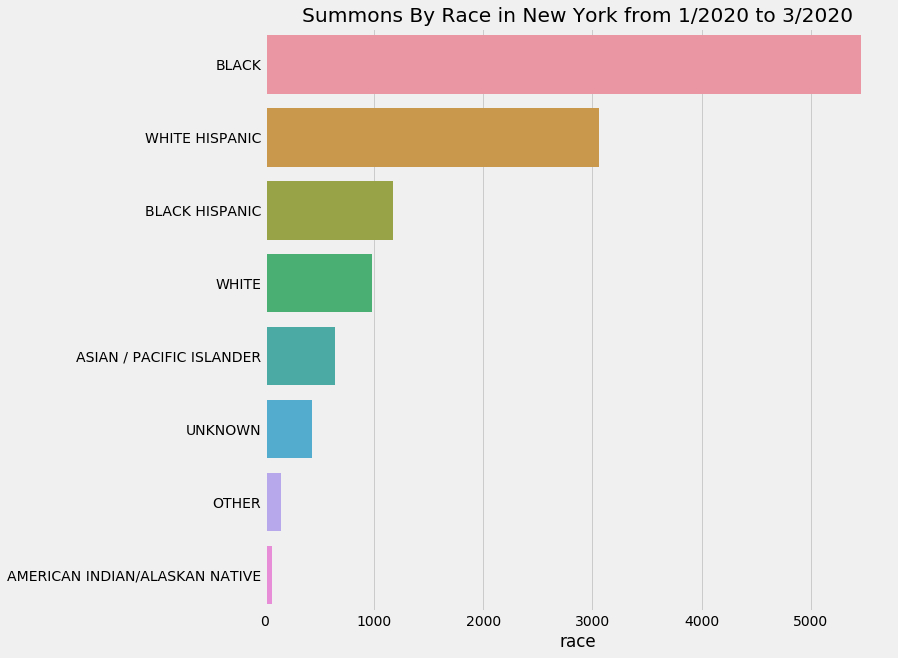

In [8]:
sns.barplot(data = summons_by_race, x = 'race', y = summons_by_race.index)
plt.title('Summons By Race in New York from 1/2020 to 3/2020')

Sadly, not surprising at all. Let's raise the dimension of this barplot by using a heatmap 

In [9]:
january = summons[summons['month'] == 1]
jan_white = january[january['race'] == 'WHITE']
jan_black = january[january['race'] == 'BLACK']


jwhite = pd.pivot_table(data = jan_white, index = 'age_group',
                    values = 'race', columns = 'day', aggfunc = 'count').fillna(0).astype(int)

jblack =  pd.pivot_table(data = jan_black, index = 'age_group',
                         values = 'race', columns = 'day', aggfunc = 'count').fillna(0).astype(int)

Text(0.5, 1, 'Number of Summons in January by Day for Whites')

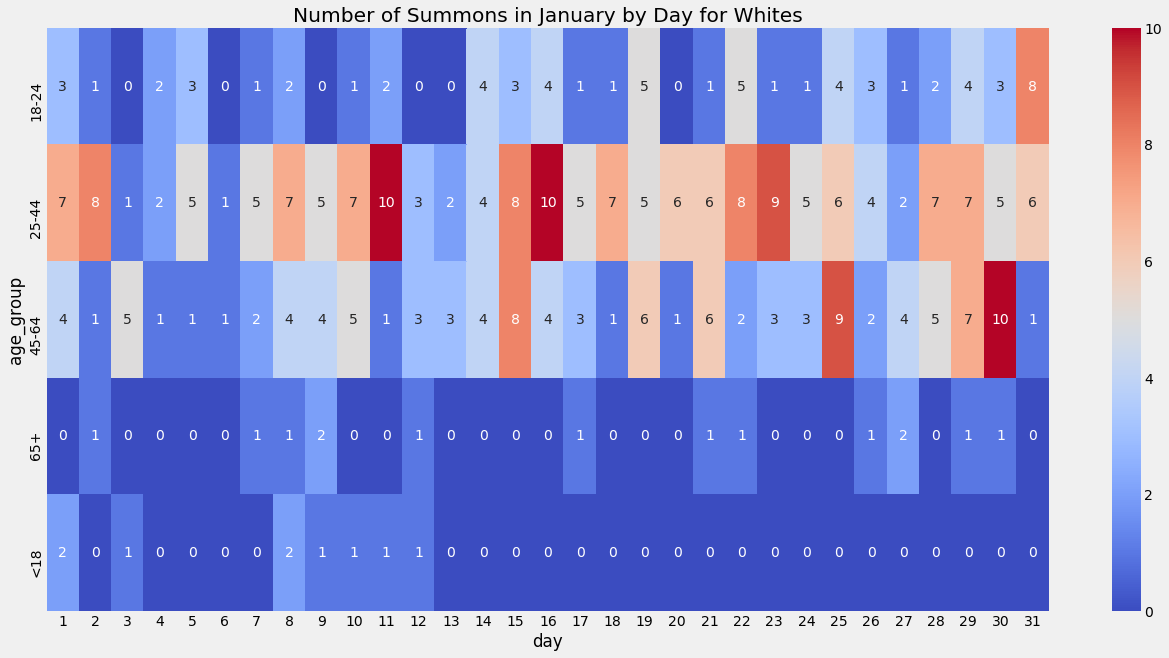

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))
heatmap = sns.heatmap(jwhite,  cmap='coolwarm',  annot=True , ax=ax)
plt.title('Number of Summons in January by Day for Whites')

Text(0.5, 1, 'Number of Summons in January by Day for Blacks')

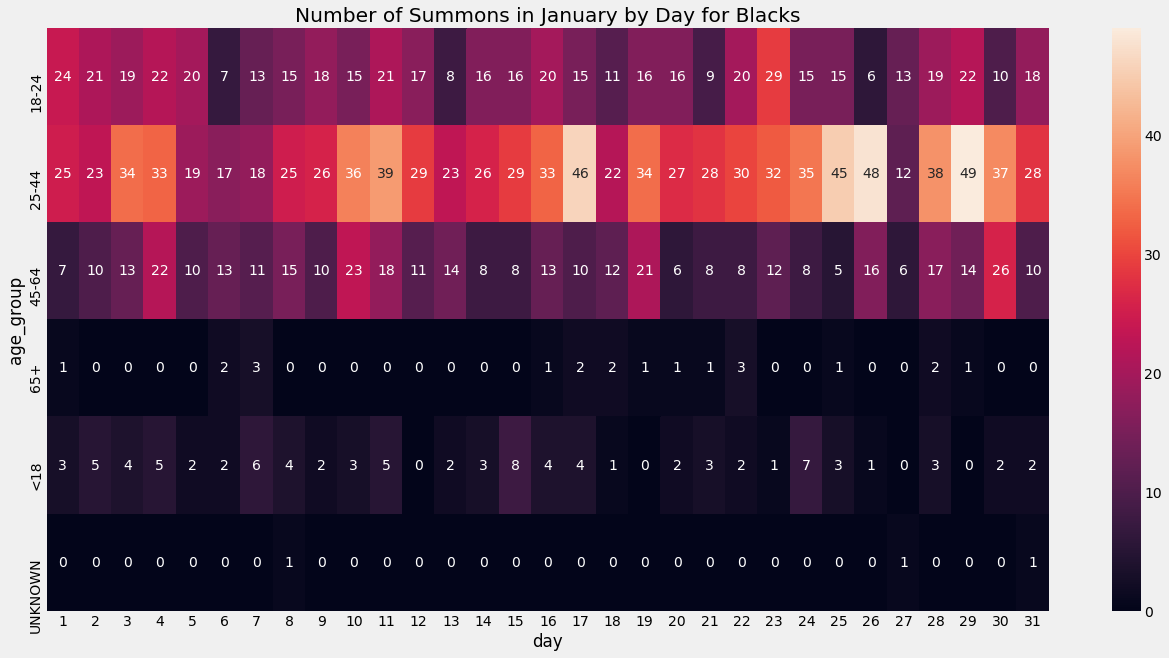

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))
heatmap = sns.heatmap(jblack,  annot=True , ax=ax)
plt.title('Number of Summons in January by Day for Blacks')

While this only capture a single month, it is a glimpse of what has been historically true in the US. Black people are incriminated by the criminal justice system more than white people and in the case of New York in January 2020th, those who were from age 25-44 were incriminated at three to four times more than white people.

# Stop, Question and Frisk Data

Within New York there is a practice of temporary detainment, questioning, and possilble inspection of civilians on the street. Popularly called the Terry stop, the allowance of such practice occured with the US Supreme Court Case in Terry v Ohio (1968) where it was determined that officers are not violating the Fourth Amendment (search and seizure) when they have probable cause for arrest. 

The word 'frisk' comes into play when an officer has suspicious that the suspect has (1) a gun and/or (2) contraband.

The policy has been tied to racial profiling and has been disputed at various times throughout its existance by lower courts.

In [17]:
sqf2019 = pd.read_excel('../data/sqf-2019.xlsx')

In [ ]:
sqf2019['SUPERVISING_OFFICER_RANK'].value_counts()